In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Dataset09-Employee-salary-prediction.csv')

In [3]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [7]:
df[df.duplicated()].shape

(50, 6)

In [8]:
df=df.drop_duplicates(keep='first')

In [9]:
df.shape

(325, 6)

In [10]:
df.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [11]:
df.dropna(how='any',inplace=True)

In [12]:
df.shape

(324, 6)

In [13]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [14]:
corr=df[['Age','Years of Experience','Salary']].corr()

In [15]:
corr

,Age,Years of Experience,Salary
Age,1.000000,0.979192,0.916543
Years of Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

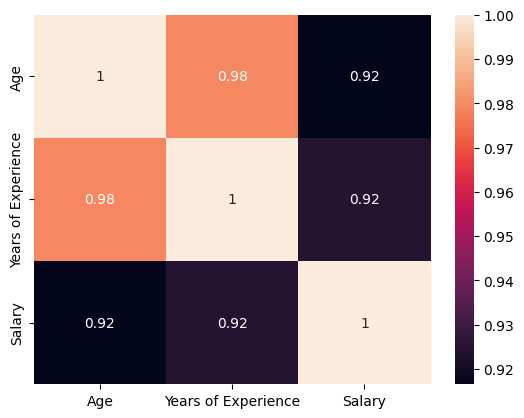

In [16]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='Education Level'>

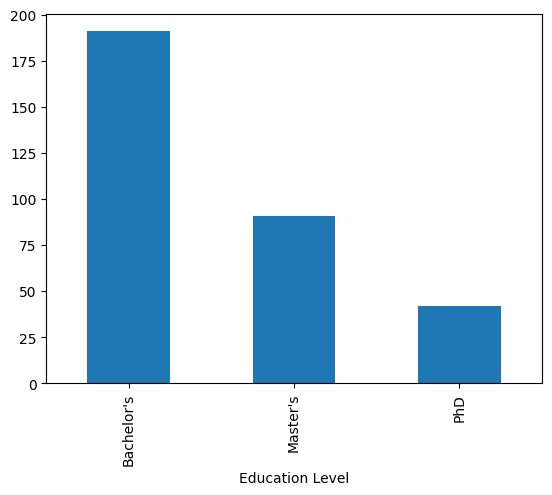

In [17]:
df['Education Level'].value_counts().plot(kind='bar')

In [18]:
df['Job Title'].value_counts()

Job Title
Director of Operations            9
Director of Marketing             8
Senior Marketing Manager          8
Senior Project Manager            7
Senior Data Scientist             6
                                 ..
Junior Social Media Specialist    1
Junior Operations Coordinator     1
Senior HR Specialist              1
Director of HR                    1
Junior Financial Advisor          1
Name: count, Length: 174, dtype: int64

<Axes: xlabel='Gender'>

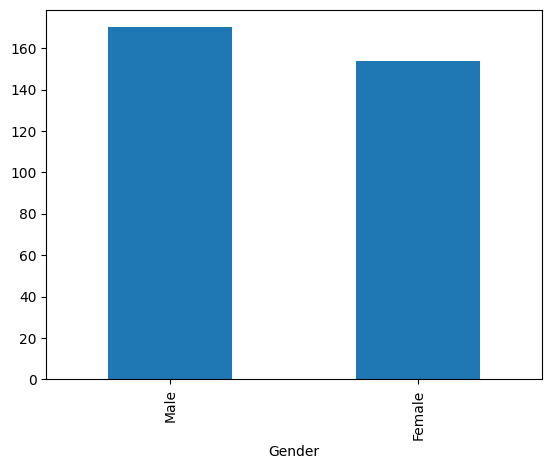

In [19]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

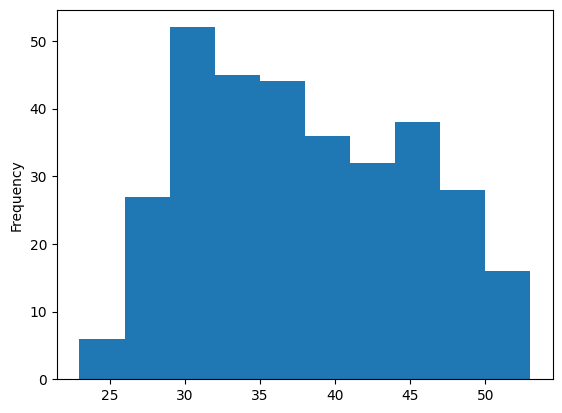

In [20]:
df['Age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

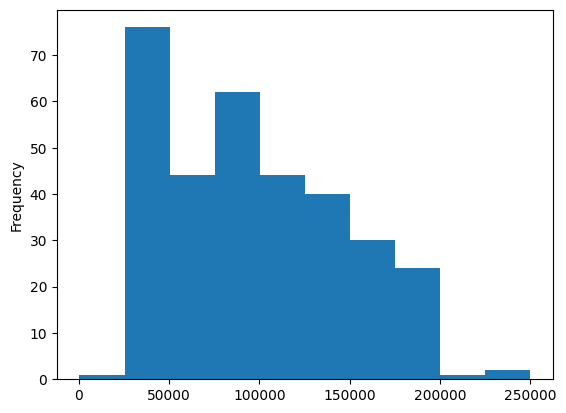

In [21]:
df['Salary'].plot(kind='hist')

In [22]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

In [23]:
df['Gender_Encode']=Label_Encoder.fit_transform(df['Gender'])

In [24]:
df['Education Level_Encode']=Label_Encoder.fit_transform(df['Education Level'])

In [25]:
df['Job Tile_Encode']=Label_Encoder.fit_transform(df['Job Title'])

In [26]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education Level_Encode,Job Tile_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
std_scaler=StandardScaler()

In [32]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education Level_Encode,Job Tile_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22
...,...,...,...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0,0,0,68
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0,1,0,111
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0,0,2,115
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0,1,0,63


In [33]:
df['Age_scaled']=std_scaler.fit_transform(df[['Age']])
df['Years of Experience_scaled']=std_scaler.fit_transform(df[['Years of Experience']])

In [34]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_Encode,Education Level_Encode,Job Tile_Encode,Age_scaled,Years of Experience_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [37]:
x=df[['Age_scaled','Gender_Encode','Years of Experience_scaled','Education Level_Encode','Job Tile_Encode']]

In [38]:
y=df['Salary']

In [39]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [40]:
x

,Age_scaled,Gender_Encode,Years of Experience_scaled,Education Level_Encode,Job Tile_Encode
0,-0.750231,1,-0.761821,0,159
1,-1.307742,0,-1.063017,1,17
2,1.061680,1,0.744158,2,130
3,-0.192720,0,-0.460625,0,101
4,2.037324,1,1.497148,1,22
...,...,...,...,...,...
348,-1.307742,0,-1.364212,0,68
349,-0.192720,1,-0.310027,0,111
350,0.922302,0,0.894756,2,115
351,-0.889609,1,-1.063017,0,63


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model=LinearRegression()

In [46]:
model.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=model.predict(x_test)

In [55]:
df1=pd.DataFrame({'y_actual':y_test,'y_predicted':y_pred})
df1['Error']=df1['y_actual']-df1['y_predicted']

In [56]:
df1

,y_actual,y_predicted,Error
132,100000.0,117344.651368,-17344.651368
108,100000.0,125310.975485,-25310.975485
137,50000.0,48239.606159,1760.393841
9,110000.0,130291.262396,-20291.262396
181,105000.0,107679.826076,-2679.826076
...,...,...,...
114,35000.0,18233.908638,16766.091362
84,40000.0,39632.756360,367.243640
212,40000.0,44862.245216,-4862.245216
248,95000.0,101119.713939,-6119.713939


In [57]:
from sklearn.metrics import accuracy_score,r2_score

In [58]:
r2_score(y_test,y_pred)

0.9011454964854873

In [76]:
a = float(input("Age: "))
b = float(input("Gender (1=male, 0=female): "))
c = float(input("Experience: "))
d = float(input("Degree: "))
e = float(input("Job Title: "))

# Reshape the inputs to match the expected format for the scaler (2D array)
a = np.array(a).reshape(1, -1)
c = np.array(c).reshape(1, -1)

# Standardize the inputs (assuming the scaler is already fitted)
a = std_scaler.transform(a)
c = std_scaler.transform(c)

# Create the final feature array to pass to the model
input_features = np.array([[a[0][0], b, c[0][0], d, e]])

# Make prediction
prediction = model.predict(input_features)

# Output prediction
print("the salary of the employee will be :", prediction)

Age:  49
Gender (1=male, 0=female):  1
Experience:  15
Degree:  2
Job Title:  22


the salary of the employee will be : [261483.82565444]
